In [ ]:
# # In this cell, we are dowloading dataset from kaggle by authenticating to Kaggle via kaggle.json
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/kaggle.json
# !chmod 600 ~/.kaggle/kaggle.json
# !pip install kaggle
# !kaggle datasets download -d andrewmvd/road-sign-detection
# !unzip road-sign-detection.zip -d data
# !mv ./data/annotations ./data/labels

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!unzip gtsrb-german-traffic-sign.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/train/5/00005_00053_00010.png  
  inflating: data/train/5/00005_00053_00011.png  
  inflating: data/train/5/00005_00053_00012.png  
  inflating: data/train/5/00005_00053_00013.png  
  inflating: data/train/5/00005_00053_00014.png  
  inflating: data/train/5/00005_00053_00015.png  
  inflating: data/train/5/00005_00053_00016.png  
  inflating: data/train/5/00005_00053_00017.png  
  inflating: data/train/5/00005_00053_00018.png  
  inflating: data/train/5/00005_00053_00019.png  
  inflating: data/train/5/00005_00053_00020.png  
  inflating: data/train/5/00005_00053_00021.png  
  inflating: data/train/5/00005_00053_00022.png  
  inflating: data/train/5/00005_00053_00023.png  
  inflating: data/train/5/00005_00053_00024.png  
  inflating: data/train/5/00005_00053_00025.png  
  inflating: data/train/5/00005_00053_00026.png  
  inflating: data/train/5/00005_00053_00027.png  
  inflating: data/train/5/00005_00053_00028.png  

In [ ]:
# # !unzip road-sign-detection.zip -d data

# import os
# import zipfile

# # Create directory for Kaggle credentials
# kaggle_dir = os.path.expanduser('~/.kaggle')
# if not os.path.exists(kaggle_dir):
#     os.makedirs(kaggle_dir)

# # Move Kaggle JSON file to the directory
# os.system('cp kaggle.json ~/.kaggle/kaggle.json')

# # Set permissions for the Kaggle JSON file
# os.system('chmod 600 ~/.kaggle/kaggle.json')

# # Install Kaggle API
# os.system('pip install kaggle')

# # Download dataset
# os.system('kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign')

# # Unzip dataset
# with zipfile.ZipFile('gtsrb-german-traffic-sign.zip', 'r') as zip_ref:
#     zip_ref.extractall('data')

import cv2
import numpy as np

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (16, 16))
    img_reshaped = img_resized.flatten()
    return img_reshaped

# Example usage
image_path = 'data/train/0/00000_00000_00000.png'
preprocessed_img = preprocess_image(image_path)
print("Preprocessed Image Shape:", preprocessed_img.shape)


Preprocessed Image Shape: (256,)


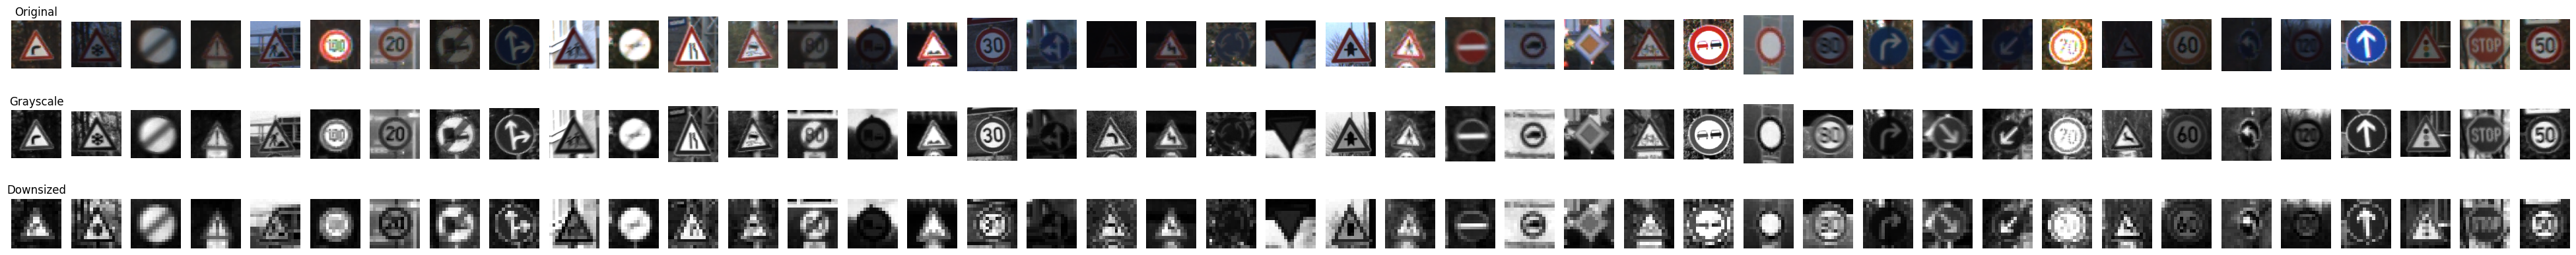

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the dataset directory
dataset_dir = 'data/train/'

# Function to find one example image from each class
def find_example_images(dataset_dir):
    example_images = []
    for class_name in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            image_files = [f for f in os.listdir(class_dir) if f.endswith('.png')]
            if image_files:
                example_image_path = os.path.join(class_dir, image_files[0])
                example_images.append(example_image_path)
    return example_images

# Find one example image from each class
example_images = find_example_images(dataset_dir)

# Set figure size and display images horizontally
plt.figure(figsize=(50, 5))

for i, example_image in enumerate(example_images):
    plt.subplot(3, len(example_images), i+1)
    # Original image
    original_img = cv2.imread(example_image)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title('Original' if i == 0 else '')
    plt.axis('off')

    plt.subplot(3, len(example_images), len(example_images) + i+1)
    # Grayscale image
    grayscale_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
    plt.imshow(grayscale_img, cmap='gray')
    plt.title('Grayscale' if i == 0 else '')
    plt.axis('off')

    plt.subplot(3, len(example_images), 2*len(example_images) + i+1)
    # Downsized image
    downsized_img = cv2.resize(grayscale_img, (16, 16))
    plt.imshow(downsized_img, cmap='gray')
    plt.title('Downsized' if i == 0 else '')
    plt.axis('off')

# plt.tight_layout(h_pad=1, w_pad=1)
plt.show()


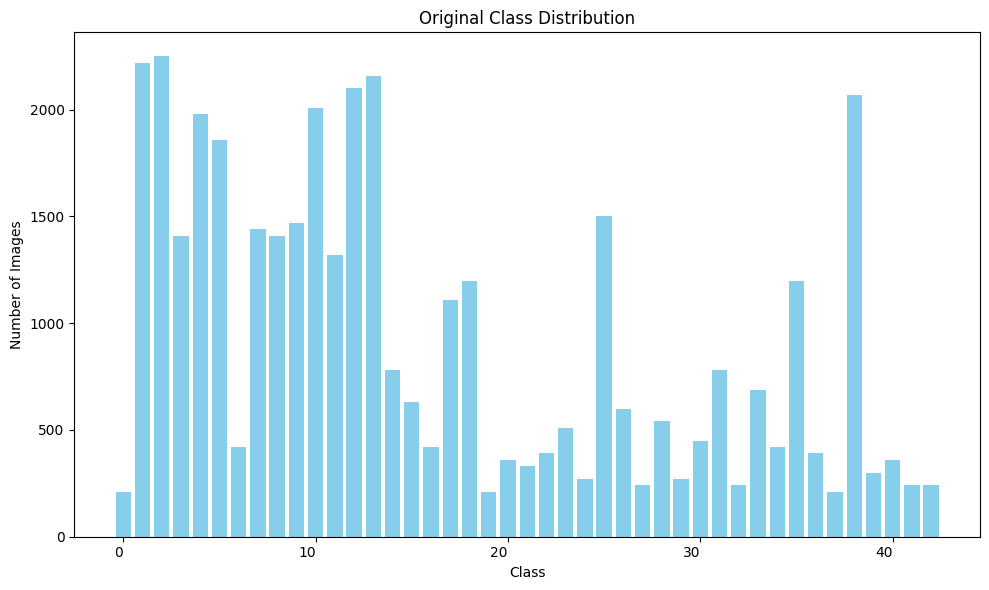

In [ ]:
import os
import matplotlib.pyplot as plt

# Path to the dataset directory
dataset_dir = 'data/train/'

# Function to count the number of images in each class
def count_images_per_class(dataset_dir):
    class_counts = {}
    for class_name in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            num_images = len([f for f in os.listdir(class_dir) if f.endswith('.png')])
            class_counts[class_name] = num_images
    return class_counts

# Get class distribution
class_distribution = count_images_per_class(dataset_dir)

# Convert class names to integers and sort them
sorted_class_distribution = {int(k): v for k, v in sorted(class_distribution.items())}

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_class_distribution.keys(), sorted_class_distribution.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Original Class Distribution')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Function to count the number of images in each class
def count_images_per_class(dataset_dir):
    class_counts = {}
    num_images = 0
    for class_name in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            num_class_images = len([f for f in os.listdir(class_dir) if f.endswith('.png')])
            class_counts[class_name] = num_class_images
            num_images += num_class_images
    num_classes = len(class_counts)
    return num_images, num_classes
# number of images and classes
num_images, num_classes = count_images_per_class(dataset_dir)

# Print the results
print("Number of Images:", num_images)
print("Number of Classes:", num_classes)

Number of Images: 39209
Number of Classes: 43


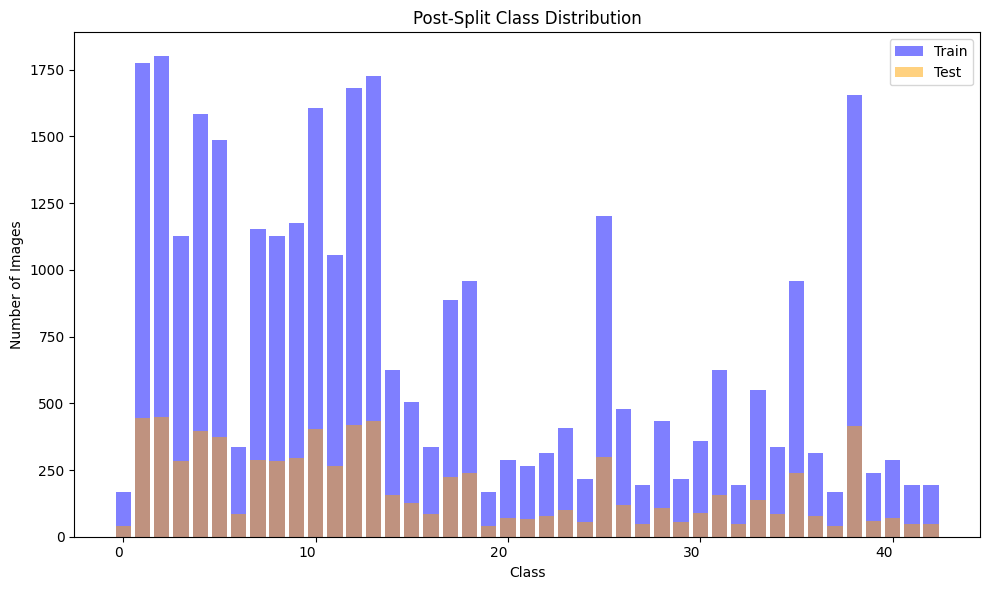

In [ ]:
from sklearn.model_selection import train_test_split

# Function to load and preprocess images
def load_images(dataset_dir):
    images = []
    labels = []
    for class_name in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                if image_name.endswith('.png'):
                    image_path = os.path.join(class_dir, image_name)
                    img = preprocess_image(image_path)
                    images.append(img)
                    labels.append(int(class_name))
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images(dataset_dir)

# Normalize data
images = images / 255.0  # Normalize to [0, 1]

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# Post-split class distribution
train_class_distribution = {class_name: np.sum(y_train == class_name) for class_name in np.unique(y_train)}
test_class_distribution = {class_name: np.sum(y_test == class_name) for class_name in np.unique(y_test)}

# Plotting the post-split class distribution
plt.figure(figsize=(10, 6))
plt.bar(train_class_distribution.keys(), train_class_distribution.values(), color='blue', alpha=0.5, label='Train')
plt.bar(test_class_distribution.keys(), test_class_distribution.values(), color='orange', alpha=0.5, label='Test')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Post-Split Class Distribution')
plt.legend()
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

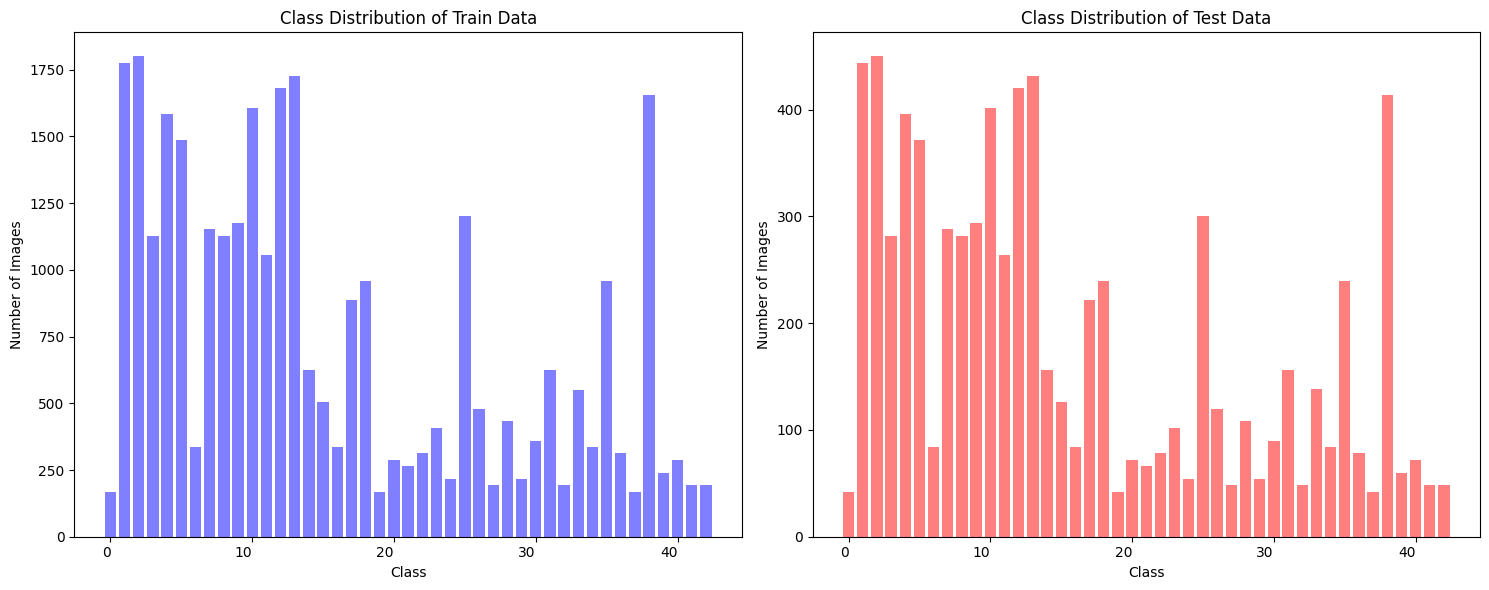

Total Number of Images in Train Data: 31367
Total Number of Images in Test Data: 7842


In [ ]:
# Plot class distribution side by side
plt.figure(figsize=(15, 6))

# Plot class distribution of train data
plt.subplot(1, 2, 1)
plt.bar(train_class_distribution.keys(), train_class_distribution.values(), color='blue', alpha=0.5)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Train Data')
plt.xticks(rotation=0, ha='right')

# Plot class distribution of test data
plt.subplot(1, 2, 2)
plt.bar(test_class_distribution.keys(), test_class_distribution.values(), color='red', alpha=0.5)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Test Data')
plt.xticks(rotation=0, ha='right')

plt.tight_layout()
plt.show()
# print("Number of Images in Each Class for Train Data:")
# for class_name, count in train_class_distribution.items():
#     print(f"Class {class_name}: {count} images")

# print("\nNumber of Images in Each Class for Test Data:")
# for class_name, count in test_class_distribution.items():
#     print(f"Class {class_name}: {count} images")

total_train_images = sum(train_class_distribution.values())
total_test_images = sum(test_class_distribution.values())

print("Total Number of Images in Train Data:", total_train_images)
print("Total Number of Images in Test Data:", total_test_images)


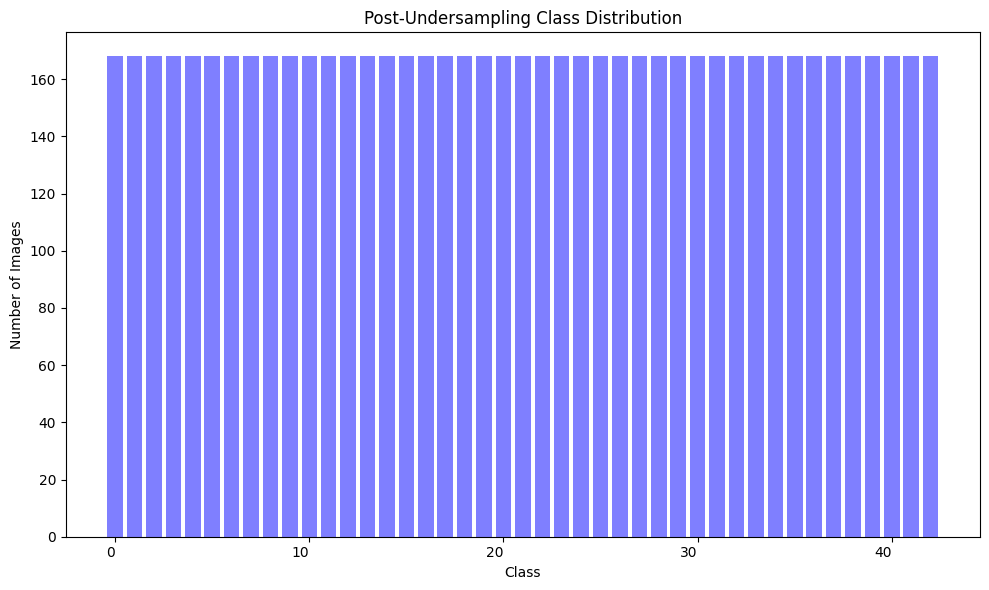

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Perform random under-sampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Post undersampling class distribution
resampled_class_distribution = {class_name: np.sum(y_resampled == class_name) for class_name in np.unique(y_resampled)}

# Plotting the post-undersampling class distribution
plt.figure(figsize=(10, 6))
plt.bar(resampled_class_distribution.keys(), resampled_class_distribution.values(), color='blue', alpha=0.5)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Post-Undersampling Class Distribution')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)


print("LDA accuracy:", accuracy_score(y_test, y_pred_lda))
print("QDA accuracy:", accuracy_score(y_test, y_pred_qda))

print("\nLDA classification report:")
print(classification_report(y_test, y_pred_lda))

print("\nQDA classification report:")
print(classification_report(y_test, y_pred_qda))

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


LDA accuracy: 0.7147411374649324
QDA accuracy: 0.6434583014537107

LDA classification report:
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        42
           1       0.94      0.62      0.75       444
           2       0.82      0.62      0.71       450
           3       0.53      0.63      0.58       282
           4       0.77      0.68      0.72       396
           5       0.23      0.82      0.37       372
           6       0.69      0.63      0.66        84
           7       0.75      0.69      0.72       288
           8       0.40      0.77      0.52       282
           9       0.98      0.77      0.86       294
          10       0.78      0.82      0.80       402
          11       0.98      0.65      0.78       264
          12       0.81      0.70      0.75       420
          13       0.99      0.72      0.83       432
          14       0.99      0.76      0.86       156
          15       0.60      0.76      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize classifiers
rf_clf = RandomForestClassifier(random_state=42)
# gb_clf = GradientBoostingClassifier(random_state=42)
ada_clf = AdaBoostClassifier(random_state=42)
svm_clf = SVC(random_state=42)
mlp_clf = MLPClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(random_state=42)

# Train classifiers
rf_clf.fit(X_resampled, y_resampled)
# gb_clf.fit(X_resampled, y_resampled)
ada_clf.fit(X_resampled, y_resampled)
svm_clf.fit(X_resampled, y_resampled)
mlp_clf.fit(X_resampled, y_resampled)
xgb_clf.fit(X_resampled, y_resampled)

# Predict on test set
rf_pred = rf_clf.predict(X_test)
# gb_pred = gb_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)
svm_pred = svm_clf.predict(X_test)
mlp_pred = mlp_clf.predict(X_test)
xgb_pred = xgb_clf.predict(X_test)

# Calculate accuracy
rf_acc = accuracy_score(y_test, rf_pred)
# gb_acc = accuracy_score(y_test, gb_pred)
ada_acc = accuracy_score(y_test, ada_pred)
svm_acc = accuracy_score(y_test, svm_pred)
mlp_acc = accuracy_score(y_test, mlp_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)

# Print accuracy
print("Random Forest Classifier Acc:", rf_acc)
# print("Gradient Boosting Classifier Acc:", gb_acc)
print("Ada Boost Classifier Acc:", ada_acc)
print("SVM Classifier Acc:", svm_acc)
print("Multi-layer Perceptron Classifier Acc:", mlp_acc)
print("XGBoost Classifier Acc:", xgb_acc)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Random Forest Classifier Acc: 0.832823259372609
Ada Boost Classifier Acc: 0.17967355266513643
SVM Classifier Acc: 0.6146391226727875
Multi-layer Perceptron Classifier Acc: 0.8482529966845193
XGBoost Classifier Acc: 0.8306554450395307


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for each classifier
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

ada_precision = precision_score(y_test, ada_pred, average='weighted')
ada_recall = recall_score(y_test, ada_pred, average='weighted')
ada_f1 = f1_score(y_test, ada_pred, average='weighted')

svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')

mlp_precision = precision_score(y_test, mlp_pred, average='weighted')
mlp_recall = recall_score(y_test, mlp_pred, average='weighted')
mlp_f1 = f1_score(y_test, mlp_pred, average='weighted')

xgb_precision = precision_score(y_test, xgb_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print precision, recall, and F1-score for each classifier
print("Random Forest Classifier:")
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print()

print("Ada Boost Classifier:")
print("Precision:", ada_precision)
print("Recall:", ada_recall)
print("F1-score:", ada_f1)
print()

print("SVM Classifier:")
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)
print()

print("Multi-layer Perceptron Classifier:")
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)
print("F1-score:", mlp_f1)
print()

print("XGBoost Classifier:")
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1-score:", xgb_f1)


Random Forest Classifier:
Precision: 0.8449359602295697
Recall: 0.832823259372609
F1-score: 0.8335117302420607

Ada Boost Classifier:
Precision: 0.25675702104339565
Recall: 0.17967355266513643
F1-score: 0.18872783598246864

SVM Classifier:
Precision: 0.7055587280050917
Recall: 0.6146391226727875
F1-score: 0.6342023684404188

Multi-layer Perceptron Classifier:
Precision: 0.8612921073827772
Recall: 0.8482529966845193
F1-score: 0.8490284062677855

XGBoost Classifier:
Precision: 0.8383912103290477
Recall: 0.8306554450395307
F1-score: 0.8315238432479476


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for each classifier
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
ada_conf_matrix = confusion_matrix(y_test, ada_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_pred)
mlp_conf_matrix = confusion_matrix(y_test, mlp_pred)
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)

# Calculate true positives, false positives, and false negatives
rf_tp = rf_conf_matrix[1, 1]  # True Positives
rf_fp = rf_conf_matrix[0, 1]  # False Positives
rf_fn = rf_conf_matrix[1, 0]  # False Negatives

ada_tp = ada_conf_matrix[1, 1]  # True Positives
ada_fp = ada_conf_matrix[0, 1]  # False Positives
ada_fn = ada_conf_matrix[1, 0]  # False Negatives

svm_tp = svm_conf_matrix[1, 1]  # True Positives
svm_fp = svm_conf_matrix[0, 1]  # False Positives
svm_fn = svm_conf_matrix[1, 0]  # False Negatives

mlp_tp = mlp_conf_matrix[1, 1]  # True Positives
mlp_fp = mlp_conf_matrix[0, 1]  # False Positives
mlp_fn = mlp_conf_matrix[1, 0]  # False Negatives

xgb_tp = xgb_conf_matrix[1, 1]  # True Positives
xgb_fp = xgb_conf_matrix[0, 1]  # False Positives
xgb_fn = xgb_conf_matrix[1, 0]  # False Negatives

# Calculate precision, recall, and F1-score
rf_precision = rf_tp / (rf_tp + rf_fp)
rf_recall = rf_tp / (rf_tp + rf_fn)
rf_f1 = 2 * (rf_precision * rf_recall) / (rf_precision + rf_recall)

ada_precision = ada_tp / (ada_tp + ada_fp)
ada_recall = ada_tp / (ada_tp + ada_fn)
ada_f1 = 2 * (ada_precision * ada_recall) / (ada_precision + ada_recall)

svm_precision = svm_tp / (svm_tp + svm_fp)
svm_recall = svm_tp / (svm_tp + svm_fn)
svm_f1 = 2 * (svm_precision * svm_recall) / (svm_precision + svm_recall)

mlp_precision = mlp_tp / (mlp_tp + mlp_fp)
mlp_recall = mlp_tp / (mlp_tp + mlp_fn)
mlp_f1 = 2 * (mlp_precision * mlp_recall) / (mlp_precision + mlp_recall)

xgb_precision = xgb_tp / (xgb_tp + xgb_fp)
xgb_recall = xgb_tp / (xgb_tp + xgb_fn)
xgb_f1 = 2 * (xgb_precision * xgb_recall) / (xgb_precision + xgb_recall)

# Print precision, recall, and F1-score
print("Random Forest Classifier:")
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print()

print("Ada Boost Classifier:")
print("Precision:", ada_precision)
print("Recall:", ada_recall)
print("F1-score:", ada_f1)
print()

print("SVM Classifier:")
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)
print()

print("Multi-layer Perceptron Classifier:")
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)
print("F1-score:", mlp_f1)
print()

print("XGBoost Classifier:")
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1-score:", xgb_f1)


Random Forest Classifier:
Precision: 0.9967948717948718
Recall: 0.9174041297935103
F1-score: 0.9554531490015361

Ada Boost Classifier:
Precision: 0.9878048780487805
Recall: 0.43548387096774194
F1-score: 0.6044776119402985

SVM Classifier:
Precision: 1.0
Recall: 0.8242677824267782
F1-score: 0.9036697247706421

Multi-layer Perceptron Classifier:
Precision: 0.9940298507462687
Recall: 0.9568965517241379
F1-score: 0.9751098096632503

XGBoost Classifier:
Precision: 0.9937106918238994
Recall: 0.9404761904761905
F1-score: 0.9663608562691132


In [ ]:
import numpy as np

def calculate_average_precision(y_true, y_score):
    sorted_indices = np.argsort(y_score)[::-1]
    y_true_sorted = y_true[sorted_indices]
    num_positive = np.sum(y_true)
    num_instances = len(y_true)

    precision_values = []
    recall_values = []
    true_positives = 0
    false_positives = 0

    for i in range(num_instances):
        if y_true_sorted[i] == 1:
            true_positives += 1
        else:
            false_positives += 1

        precision = true_positives / (true_positives + false_positives)
        recall = true_positives / num_positive

        precision_values.append(precision)
        recall_values.append(recall)

    # Calculate average precision using the precision-recall curve
    ap = np.sum([precision_values[i] * (recall_values[i] - recall_values[i-1]) for i in range(1, num_instances)])
    return ap

def calculate_mAP(y_true, y_scores, y_pred):
    num_classes = y_scores.shape[1]
    ap_values = []

    for class_index in range(num_classes):
        class_y_true = (y_true == class_index)
        class_y_scores = y_scores[:, class_index]
        class_y_pred = (y_pred == class_index)
        ap = calculate_average_precision(class_y_true, class_y_scores)
        ap_values.append(ap)

    mAP = np.mean(ap_values)
    return mAP


# Assuming y_test and predicted probabilities (y_scores) for each class from each classifier
# y_test: true labels (one-hot encoded for multiclass)
# y_scores: predicted probabilities for each class (shape: [num_samples, num_classes])

# Example usage:
y_scores_rf = rf_clf.predict_proba(X_test)  # assuming rf_clf is the trained Random Forest classifier
y_pred_rf = rf_clf.predict(X_test)
mAP_rf = calculate_mAP(y_test, y_scores_rf, y_pred_rf)

y_scores_ada = ada_clf.predict_proba(X_test)  # assuming ada_clf is the trained AdaBoost classifier
y_pred_ada = ada_clf.predict(X_test)
mAP_ada = calculate_mAP(y_test, y_scores_ada, y_pred_ada)

# Calculate mAP for SVM Classifier
y_scores_svm = svm_clf.decision_function(X_test)  # For SVM, use decision_function instead of predict_proba
y_pred_svm = svm_clf.predict(X_test)
mAP_svm = calculate_mAP(y_test, y_scores_svm, y_pred_svm)

# Calculate mAP for MLP Classifier
y_scores_mlp = mlp_clf.predict_proba(X_test)
y_pred_mlp = mlp_clf.predict(X_test)
mAP_mlp = calculate_mAP(y_test, y_scores_mlp, y_pred_mlp)

# Calculate mAP for XGBoost Classifier
y_scores_xgb = xgb_clf.predict_proba(X_test)
y_pred_xgb = xgb_clf.predict(X_test)
mAP_xgb = calculate_mAP(y_test, y_scores_xgb, y_pred_xgb)

# Print mAP for each classifier
print("Mean Average Precision (mAP) for Random Forest Classifier:", mAP_rf)
print("Mean Average Precision (mAP) for AdaBoost Classifier:", mAP_ada)
print("Mean Average Precision (mAP) for SVM Classifier:", mAP_svm)
print("Mean Average Precision (mAP) for MLP Classifier:", mAP_mlp)
print("Mean Average Precision (mAP) for XGBoost Classifier:", mAP_xgb)



Mean Average Precision (mAP) for Random Forest Classifier: 0.9151651538117878
Mean Average Precision (mAP) for AdaBoost Classifier: 0.10594437550637079
Mean Average Precision (mAP) for SVM Classifier: 0.6887839433945039
Mean Average Precision (mAP) for MLP Classifier: 0.9037197507540554
Mean Average Precision (mAP) for XGBoost Classifier: 0.9138456467564836


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression classifier
lr_classifier = LogisticRegression(max_iter=1000)

# Train the classifier
lr_classifier.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = lr_classifier.predict(X_train)
y_test_pred = lr_classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)


Training accuracy: 0.8962285204195493
Testing accuracy: 0.8647028819178781


In [ ]:
# Predict probabilities on the training and testing data
y_train_scores_lr = lr_classifier.predict_proba(X_train)
y_test_scores_lr = lr_classifier.predict_proba(X_test)

# Calculate precision, recall, and F1-score for Logistic Regression Classifier
precision_lr = precision_score(y_test, y_test_pred, average='weighted')
recall_lr = recall_score(y_test, y_test_pred, average='weighted')
f1_lr = f1_score(y_test, y_test_pred, average='weighted')

# Calculate mAP for Logistic Regression Classifier
mAP_lr = calculate_mAP(y_test, y_test_scores_lr, y_test_pred)

# Print precision, recall, F1-score, and mAP for Logistic Regression Classifier
print("Precision for Logistic Regression Classifier:", precision_lr)
print("Recall for Logistic Regression Classifier:", recall_lr)
print("F1-score for Logistic Regression Classifier:", f1_lr)
print("Mean Average Precision (mAP) for Logistic Regression Classifier:", mAP_lr)


Precision for Logistic Regression Classifier: 0.8705914693880649
Recall for Logistic Regression Classifier: 0.8647028819178781
F1-score for Logistic Regression Classifier: 0.8649272445623526
Mean Average Precision (mAP) for Logistic Regression Classifier: 0.896988399280103


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.9092995823636306
Testing accuracy: 0.8366488140780414


In [ ]:
# Predict probabilities on the training and testing data
# For KNN, we'll use the predicted labels for now, as KNN does not directly provide probabilities
y_train_scores_knn = knn_classifier.predict(X_train)
y_test_scores_knn = knn_classifier.predict(X_test)

# Calculate precision, recall, and F1-score for KNN Classifier
precision_knn = precision_score(y_test, y_test_pred, average='weighted')
recall_knn = recall_score(y_test, y_test_pred, average='weighted')
f1_knn = f1_score(y_test, y_test_pred, average='weighted')

# Calculate mAP for KNN Classifier
from sklearn.metrics import precision_recall_curve

def calculate_mAP_knn(y_true, X_train, X_test, k_neighbors):
    mAP_values = []

    for i in range(len(X_test)):
        # Calculate distances to all samples in the training set for the current test sample
        distances = np.linalg.norm(X_train - X_test[i], axis=1)

        # Sort distances and corresponding labels for the current instance
        sorted_indices = np.argsort(distances)
        sorted_labels = y_true[sorted_indices]

        # Convert multiclass labels to binary labels for each class
        binary_labels = np.zeros_like(sorted_labels)
        for class_index in np.unique(y_true):
            binary_labels[sorted_labels == class_index] = 1 if class_index == y_true[i] else 0

        # Compute precision and recall at each rank
        precisions, recalls, _ = precision_recall_curve(binary_labels, distances)

        # Compute average precision for the current instance
        ap = np.sum(precisions * recalls) / k_neighbors
        mAP_values.append(ap)

    # Calculate mean Average Precision (mAP)
    mAP = np.mean(mAP_values)
    return mAP


# Example usage
# Assuming X_train and X_test are the feature matrices for the training and testing data, respectively
# Assuming k_neighbors is the number of nearest neighbors used in KNN
k_neighbors = 5
mAP_knn = calculate_mAP_knn(y_test, X_resampled, X_test, k_neighbors)
# print("Mean Average Precision (mAP) for KNN Classifier:", mAP_knn)



# Print precision, recall, F1-score, and mAP for KNN Classifier
print("Precision for KNN Classifier:", precision_knn)
print("Recall for KNN Classifier:", recall_knn)
print("F1-score for KNN Classifier:", f1_knn)
print("Mean Average Precision (mAP) for KNN Classifier:", mAP_knn)


Precision for KNN Classifier: 0.8449789777528623
Recall for KNN Classifier: 0.8366488140780414
F1-score for KNN Classifier: 0.8379423914084224
Mean Average Precision (mAP) for KNN Classifier: 26.486709659158116


In [ ]:
import numpy as np

# Calculate covariance matrix
cov_matrix = np.cov(X_resampled, rowvar=False)

# Compute eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Select top k eigenvectors
k = 72
top_k_eigenvectors = sorted_eigenvectors[:, :k]

# Transform data using selected eigenvectors
X_pca_scratch = np.dot(X_resampled, top_k_eigenvectors)

# Print original and new shape
print("Original Shape of Reshaped Grayscale Data:", X_resampled.shape)
print("New Shape after PCA from scratch:", X_pca_scratch.shape)


# VGG16

In [ ]:
import cv2
import numpy as np
import random
from sklearn.utils import shuffle

def MinMaxNorm(image, a=-.5, b=.5) :
    Xmin, Xmax = np.min(image), np.max(image)
    return (image-Xmin)*(b-a)/(Xmax-Xmin)

def AbsNorm(image, a=-.5, b=0.5, col_min=0, col_max=255) :
    return (image-col_min)*(b-a)/(col_max-col_min)

# def grayscale_norm(image) :
#     # Ensure the image is in the range [0, 255]
#     img = MinMaxNorm(image.reshape(-1), 0, 255).reshape(image.shape)
#     return MinMaxNorm(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2GRAY))
def grayscale_norm(image):
    # Ensure the image is in the range [0, 255]
    img = MinMaxNorm(image.reshape(-1), 0, 255).reshape(image.shape)
    return MinMaxNorm(img)

# def YUV_norm(image):
#     # Convert grayscale image to BGR format with 3 channels
#     bgr_img = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_GRAY2BGR)
#     # Convert BGR image to YUV color space
#     yuv_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2YUV)
#     # Normalize the Y channel
#     yuv_img[:, :, 0] = MinMaxNorm(yuv_img[:, :, 0])
#     # Normalize the U and V channels
#     yuv_img[:, :, 1] = AbsNorm(yuv_img[:, :, 1])
#     yuv_img[:, :, 2] = AbsNorm(yuv_img[:, :, 2])
#     return yuv_img

def YUV_norm(image):
    # Convert image to the appropriate data type (uint8)
    image = image.astype(np.uint8)
    if len(image.shape) == 2:  # Check if the image is grayscale
        # Convert grayscale image to BGR format with 3 channels
        bgr_img = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    else:
        # Image is already in BGR format
        bgr_img = image
    # Convert BGR image to YUV color space
    yuv_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2YUV)
    # Normalize the Y channel
    yuv_img[:, :, 0] = MinMaxNorm(yuv_img[:, :, 0])
    # Normalize the U and V channels
    yuv_img[:, :, 1] = AbsNorm(yuv_img[:, :, 1])
    yuv_img[:, :, 2] = AbsNorm(yuv_img[:, :, 2])
    return yuv_img

# def contrast_norm(image):
#     # Convert image to the appropriate data type (uint8)
#     image = image.astype(np.uint8)
#     # Convert to BGR color space if the image is grayscale
#     if len(image.shape) == 2:
#         bgr_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
#     else:
#         bgr_image = image
#     # Convert to LAB color space
#     lab = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2LAB)
#     # Apply adaptive histogram equalization to the L channel
#     l_channel = lab[:, :, 0]
#     clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(4, 4))
#     cl = clahe.apply(l_channel)
#     lab[:, :, 0] = cl
#     # Convert back to BGR color space and scale values
#     img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
#     # Normalize pixel values
#     norm_img = AbsNorm(img)
#     return norm_img
def contrast_norm(image) :
    if len(image.shape) == 2:
        bgr_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    else:
        bgr_image = image
    # apply adative histogram equalization
    l = bgr_image[:,:,0]
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(4,4))
    cl = clahe.apply(l)
    bgr_image[:,:,0] = cl
    # convert back to RGB and scale values
    img =  cv2.cvtColor(bgr_image, cv2.COLOR_LAB2BGR)
    new_img = np.zeros(image.shape)
    for i in range(3) :
        new_img[:,:,i] = AbsNorm(img[:,:,i])
    return new_img

# Visualize the normalization techniques
img_index = split_by_class(y_train)
img = X_train[img_index[25][20]].reshape(16, 16)  # Adjust reshaping to (16, 16)

fig, ax = plt.subplots(1, 6, figsize=(20, 5))

# Set titles
titles = ['Original', 'Gray scale', 'Y of YUV', 'U of YUV', 'V of YUV', 'Contrast norm.']

for axes, title in zip(ax, titles):
    axes.axis('off')
    axes.set_title(title)

# Plot original image
ax[0].imshow(img, cmap='gray')  # Use cmap='gray' for grayscale images

# Plot grayscale normalized image
gray_norm_img = grayscale_norm(img)
ax[1].imshow(gray_norm_img, cmap='gray')

# Plot YUV normalized image
yuv_norm_img = YUV_norm(img)
for i in range(3):
    ax[i + 2].imshow(yuv_norm_img[:, :, i], cmap='gray')  # Use cmap='gray' for grayscale images

# Plot contrast normalized image
contrast_norm_img = contrast_norm(img)
ax[5].imshow(contrast_norm_img, cmap='gray')  # Use cmap='gray' for grayscale images

plt.show()


# New Section

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [ ]:
# imgs_path = "/content/drive/MyDrive/SML/Train"
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((30,30))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)
print("Done")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data, labels, test_size= 0.1, random_state=10)

print("training_shape: ", x_train.shape,y_train.shape)
print("testing_shape: ", x_test.shape,y_test.shape)

y_train = tf.one_hot(y_train,43)
y_test = tf.one_hot(y_test,43)

In [ ]:


#building the CNN Model
#Adding a Convnet of 32 filters and relu activation
#Adding a Convnet of 32 filters and relu activation
#Adding a Maxpool Layer of (2,2)
#Adding Dropout Regularization with rate= 0.25
#Adding a Convnet of 64 filters and relu activation
#Adding a MaxPool layer of (2,2)
#Adding a Dropout Regularization with rate = 0.25
#Flattening the Model
#Dense layer with Tanh activation
#Final Softmax to categorize the data

model = tf.keras.Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape= x_train.shape[1:]))
model.add((Conv2D(filters=64, kernel_size=(5,5), activation="relu")))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add((Conv2D(filters=128,kernel_size=(3,3),activation="relu")))
model.add((MaxPool2D(pool_size=(2,2))))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(rate=0.40))
model.add(Dense(43, activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
epochs = 25
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("accuracy (0,1)")
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss Graph")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

y_test = pd.read_csv("/content/drive/MyDrive/SML/Test.csv")
test_labels = y_test['ClassId'].values
test_img_path = "/content/drive/MyDrive/SML/"
test_imgs = y_test['Path'].values

test_data = []
test_labels = []

for img in test_imgs:
    im = Image.open(test_img_path + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)

test_data = np.array(test_data)
print(test_data.shape)

import warnings
warnings.filterwarnings("ignore")
test_labels = y_test['ClassId'].values
test_labels

In [ ]:
predictions = model.predict_classes(test_data)
print("accuracy: ", accuracy_score(test_labels, predictions))